## RSOS
###### Author: Zimu Huo
###### Date: 01.2022

### Key points

Classic paper

-------------------------------------------------------------------------
References
    
    [1] 
    Author: P B Roemer et al. 
    Title: The NMR phased array
    Link: https://pubmed.ncbi.nlm.nih.gov/2266841/

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
import util.phantom as phantom
from util.GRAPPA import *

In [2]:
indSlice = np.asarray([2], dtype = int)
numSlice = len(indSlice)
R = 2
from util.twix import *
file_sms = "../lib/resource/data/multicoil_4slice/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,0]
rawImage = ifft2c(data)
acs = simulate.acs(data, (32, 32))
dataR = data[::R]

Software version: VD/VE (!?)

Scan  0
100 % parsed in 1 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 1 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary(except for the noise scan).
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


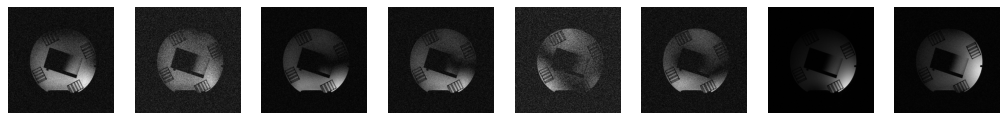

In [3]:
plt.figure(figsize=(16, 12), dpi=80)
for idx in range(8):
    plt.subplot(1, 8, idx+1)
    plt.imshow(np.abs(ifft2c(data[:,:,idx])), cmap='gray')
    plt.axis('off')
plt.show()

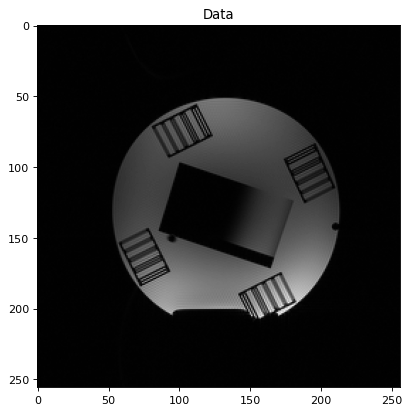

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.abs(rsos(ifft2c(data))),cmap='gray')
plt.title("Data")
plt.show()

In [5]:
noise = np.zeros([128,256,12], dtype = complex).flatten()
noise.real = np.random.normal(0, 1, 128*256*12)
noise.imag = np.random.normal(0, 1, 128*256*12)
noise = noise.reshape(128,256,12)

In [6]:
recon = rsos(ifft2c(noise))

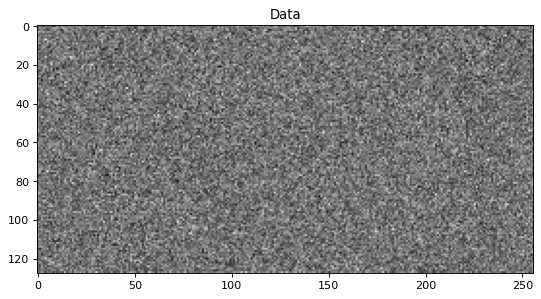

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.abs(recon),cmap='gray')
plt.title("Data")
plt.show()